# Similarities among Neighborhoods in Mumbai and Bangalore

## 0. Importing required libraries

In [160]:
import numpy as np
import pandas as pd
import requests
import random
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize
import folium
from folium.plugins import MiniMap
from geopy.geocoders import Nominatim
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn import metrics
from PIL import Image
import matplotlib.patches as mpatches
from wordcloud import WordCloud, get_single_color_func
print('Libraries imported.')

Libraries imported.


## 1. Data Collection and Visualization

### 1.1 Data Collection for Mumbai

importing a csv file with all the neighbourhoods 
(Data has been scraped from https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai and cleaned)

In [161]:
df_mumbai = pd.read_csv("neighbourhoods_in_mumbai.csv")
df_mumbai.drop_duplicates(subset='neighbourhoods')
df_mumbai.head()

,neighbourhoods
0,Andheri
1,Bhayandar
2,Bandra
3,Borivali
4,Dahisar


Getting the coordinates of the neighbourhoods using the Geopy library

In [162]:
latitudes = []
longitudes = []
mumbai_list = df_mumbai['neighbourhoods'].tolist()

for neighbourhood in mumbai_list:
  address = neighbourhood + ', Mumbai, India'
  geolocator = Nominatim(user_agent="my-application")
  location = geolocator.geocode(address)
  latitudes.append(location.latitude)
  longitudes.append(location.longitude)
  print('The geograpical coordinate of {} are {}, {}.'.format(address, location.latitude, location.longitude))

The geograpical coordinate of Andheri, Mumbai, India are 19.1196976, 72.8464205.
The geograpical coordinate of Bhayandar, Mumbai, India are 19.1971521, 72.8113662.
The geograpical coordinate of Bandra, Mumbai, India are 19.0549792, 72.8402203.
The geograpical coordinate of Borivali, Mumbai, India are 19.229068, 72.8573628.
The geograpical coordinate of Dahisar, Mumbai, India are 19.2494501, 72.8596206.
The geograpical coordinate of Goregaon, Mumbai, India are 19.1647526, 72.8500176.
The geograpical coordinate of Jogeshwari, Mumbai, India are 19.1348994, 72.8488199.
The geograpical coordinate of Juhu, Mumbai, India are 19.1070215, 72.8275275.
The geograpical coordinate of Kandivali west, Mumbai, India are 19.2083801, 72.842227.
The geograpical coordinate of Kandivali east, Mumbai, India are 19.2102005, 72.8648909.
The geograpical coordinate of Khar, Mumbai, India are 19.0696584, 72.8398944.
The geograpical coordinate of Malad, Mumbai, India are 19.1867193, 72.8485884.
The geograpical co

In [163]:
address = 'Mumbai, India'

location = geolocator.geocode(address)
mum_latitude = location.latitude
mum_longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, mum_latitude, mum_longitude))

The geograpical coordinate of Mumbai, India are 18.9387711, 72.8353355.


adding the coordinates to the dataframe

In [164]:
df_mumbai.insert(1, "latitude", latitudes, True)
df_mumbai.insert(1, "longitude", longitudes, True)
df_mumbai.head()

,neighbourhoods,longitude,latitude
0,Andheri,72.846420,19.119698
1,Bhayandar,72.811366,19.197152
2,Bandra,72.840220,19.054979
3,Borivali,72.857363,19.229068
4,Dahisar,72.859621,19.249450


exporting the dataframe to a .csv file

In [0]:
df_mumbai.to_csv("mumbai.csv")

### 1.2 Data Collection for Bangalore

Data collection for Bangalore is done in the exact same method as of Mumbai

(Data has been scraped from https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore and cleaned)

In [166]:
df_bangalore = pd.read_csv("neighbourhoods_in_bangalore.csv")
df_bangalore.drop_duplicates(subset='neighbourhoods')
df_bangalore.head()

,neighbourhoods
0,Cantonment
1,Domlur
2,Indiranagar
3,Chickpete
4,Malleshwaram


In [168]:
latitudes = []
longitudes = []
bangalore_list = df_bangalore['neighbourhoods'].tolist()

for neighbourhood in bangalore_list:
  address = neighbourhood + ', Bangalore, India'
  geolocator = Nominatim(user_agent="my-application")
  location = geolocator.geocode(address)
  latitudes.append(location.latitude)
  longitudes.append(location.longitude)
  print('The geograpical coordinate of {} are {}, {}.'.format(address, location.latitude, location.longitude))

The geograpical coordinate of Cantonment, Bangalore, India are 12.9791198, 77.5912997.
The geograpical coordinate of Domlur, Bangalore, India are 12.9624669, 77.6381958.
The geograpical coordinate of Indiranagar, Bangalore, India are 12.9732913, 77.6404672.
The geograpical coordinate of Chickpete, Bangalore, India are 12.9708285, 77.57651913586389.
The geograpical coordinate of Malleshwaram, Bangalore, India are 13.0027353, 77.5703253.
The geograpical coordinate of Yelahanka, Bangalore, India are 13.1006982, 77.5963454.
The geograpical coordinate of Sadashivanagar, Bangalore, India are 13.0077079, 77.5795893.
The geograpical coordinate of Yeshwanthpur, Bangalore, India are 13.0214, 77.5518295.
The geograpical coordinate of Shivajinagar, Bangalore, India are 12.986391, 77.6075416.
The geograpical coordinate of Ulsoor, Bangalore, India are 12.9778793, 77.6246697.
The geograpical coordinate of Vasanthnagar, Bangalore, India are 12.992415999999999, 77.5963467.
The geograpical coordinate of

In [169]:
address = 'Bangalore, India'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
blr_latitude = location.latitude
blr_longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, blr_latitude, blr_longitude))

The geograpical coordinate of Bangalore, India are 12.9791198, 77.5912997.


In [170]:
df_bangalore.insert(1, "latitude", latitudes, True)
df_bangalore.insert(1, "longitude", longitudes, True)
df_bangalore

,neighbourhoods,longitude,latitude
0,Cantonment,77.591300,12.979120
1,Domlur,77.638196,12.962467
2,Indiranagar,77.640467,12.973291
3,Chickpete,77.576519,12.970828
4,Malleshwaram,77.570325,13.002735
5,Yelahanka,77.596345,13.100698
6,Sadashivanagar,77.579589,13.007708
7,Yeshwanthpur,77.551829,13.021400
8,Shivajinagar,77.607542,12.986391
9,Ulsoor,77.624670,12.977879


In [0]:
df_bangalore.to_csv('bangalore.csv')

### 1.3 Exporting the data 

appending the data of bangalore and Mumbai into a single dataframe

In [172]:
temp_df = df_bangalore
df = df_mumbai.append(temp_df, True).reset_index(drop = True)
df

,neighbourhoods,longitude,latitude
0,Andheri,72.846420,19.119698
1,Bhayandar,72.811366,19.197152
2,Bandra,72.840220,19.054979
3,Borivali,72.857363,19.229068
4,Dahisar,72.859621,19.249450
...,...,...,...
92,Gottigere,77.587724,12.856532
93,Arekere,77.596049,12.887209
94,Mahalakshmi Layout,77.544697,13.011315
95,Nagarbhavi,77.512172,12.954674


exporting the appended dataset to a .csv file

In [0]:
df.to_csv("blr_mum.csv")

### 1.4 Visualizing the data fetched

In [174]:
centerLatitude = (blr_latitude + mum_latitude)/2
centerLongitude = (blr_longitude + mum_longitude)/2

print('\nThe geograpical central coordinates are {}, {}.'.format(centerLatitude, centerLongitude))


The geograpical central coordinates are 15.95894545, 75.2133176.


map of Bangalore and Mumbai

In [175]:
map_blr_mum = folium.Map(location=[centerLatitude, centerLongitude], zoom_start=6, width='100%', height='100%')

for lat, lng, neighborhood in zip(df['latitude'], df['longitude'], df['neighbourhoods']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_blr_mum)

map_blr_mum

map of bangalore

In [176]:
map_blr_mum = folium.Map(location=[blr_latitude, blr_longitude], zoom_start=11, width='100%', height='100%')

for lat, lng, neighborhood in zip(df['latitude'], df['longitude'], df['neighbourhoods']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_blr_mum)

minimap = MiniMap(position = 'topleft', center_fixed = (blr_latitude, blr_longitude), zoom_level_fixed = 8)
minimap.add_to(map_blr_mum)

minimap = MiniMap(position='bottomright',  center_fixed = (mum_latitude, mum_longitude), zoom_level_fixed = 8)
minimap.add_to(map_blr_mum)

map_blr_mum

map of mumbai

In [177]:
map_blr_mum = folium.Map(location=[mum_latitude, mum_longitude], zoom_start=11, width='100%', height='100%')

for lat, lng, neighborhood in zip(df['latitude'], df['longitude'], df['neighbourhoods']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_blr_mum)

minimap = MiniMap(position = 'topleft', center_fixed = (mum_latitude, mum_longitude), zoom_level_fixed = 8)
minimap.add_to(map_blr_mum)

minimap = MiniMap(position='bottomright',  center_fixed = (blr_latitude, blr_longitude), zoom_level_fixed = 8)
minimap.add_to(map_blr_mum)

map_blr_mum

## 2. Making a call to the FourSquare API

### 2.1 Setting the FourSquare API Credentials

In [178]:
CLIENT_ID = 'RN3OAISPZJDFE5ACUJNUIQPZMJYHFQ2VYZWPTGZE2BX3RRQU' # your Foursquare ID
CLIENT_SECRET = 'SW52TQYGCERWUJKA1S44BPNEVHWRCO3F1MJX5VIRMMXFFYGM' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RN3OAISPZJDFE5ACUJNUIQPZMJYHFQ2VYZWPTGZE2BX3RRQU
CLIENT_SECRET:SW52TQYGCERWUJKA1S44BPNEVHWRCO3F1MJX5VIRMMXFFYGM


### 2.2 Making the HTTP call to the FourSquare API

In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def getNearbyVenues(names, latitudes, longitudes, radius=3000):
    ind = 1
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        tmp=[]
        print(color.BOLD+str(ind)+" | "+name+color.END)
        ind += 1
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #tmp.append([(j['venue']['name']) for j in results])
        #for item in tmp[0]:
        #    print("\t",item)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    print("\nDone!")
    return(nearby_venues)

In [180]:
blr_mum_venues = getNearbyVenues(names=df['neighbourhoods'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

1 | Andheri
2 | Bhayandar
3 | Bandra
4 | Borivali
5 | Dahisar
6 | Goregaon
7 | Jogeshwari
8 | Juhu
9 | Kandivali west
10 | Kandivali east
11 | Khar
12 | Malad
13 | Santacruz
14 | Vasai
15 | Virar
16 | Vile Parle
17 | Bhandup
18 | Ghatkopar
19 | Kanjurmarg
20 | Kurla
21 | Mulund
22 | Powai
23 | Vidyavihar
24 | Vikhroli
25 | Chembur
26 | Govandi
27 | Mankhurd
28 | Trombay
29 | Antop Hill
30 | Byculla
31 | Colaba
32 | Dadar
33 | Fort
34 | Girgaon
35 | Kalbadevi
36 | Kamathipura
37 | Matunga
38 | Parel
39 | Tardeo
40 | Cantonment
41 | Domlur
42 | Indiranagar
43 | Chickpete
44 | Malleshwaram
45 | Yelahanka
46 | Sadashivanagar
47 | Yeshwanthpur
48 | Shivajinagar
49 | Ulsoor
50 | Vasanthnagar
51 | Bellandur
52 | BTM Layout
53 | Electronic City
54 | HSR Layout
55 | Koramangala
56 | Marathalli
57 | Banashankari
58 | Whitefield
59 | Banaswadi
60 | Basavanagudi
61 | JP Nagar
62 | Jayanagar
63 | Nagarbhavi
64 | Rajajinagar
65 | Sarjapur
66 | Hebbal
67 | Jeevanbheema Nagar
68 | Chickpet
69 | RT Nag

## 3. Performing Machine Learning

### 3.1 Onehot encoding the data

In [181]:
blr_mum_onehot = pd.get_dummies(blr_mum_venues[['Venue Category']], prefix="", prefix_sep="")


# add neighborhood column back to dataframe
blr_mum_onehot['Neighborhood'] = blr_mum_venues['Neighborhood'] 
blr_mum_onehot['Neighborhood Latitude'] = blr_mum_venues['Neighborhood Latitude']
blr_mum_onehot['Neighborhood Longitude'] = blr_mum_venues['Neighborhood Longitude']


# move neighborhood column to the first column
fixed_columns = [blr_mum_onehot.columns[-1]] + list(blr_mum_onehot.columns[:-1])
blr_mum_onehot = blr_mum_onehot[fixed_columns]

blr_mum_grouped = blr_mum_onehot.groupby(['Neighborhood','Neighborhood Latitude','Neighborhood Longitude']).mean().reset_index()
   
blr_mum_grouped

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Afghan Restaurant,Airport,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Auto Workshop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,...,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Toll Booth,Toy / Game Store,Track,Trail,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Andheri,19.119698,72.846420,0.0,0.000000,0.020000,0.00,0.0,0.0,0.0,0.0,0.010000,0.00,0.00,0.0,0.0,0.020000,0.000000,0.0,0.010000,0.0,0.03,0.01,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.000000,0.0,0.010000,0.010000,0.0,0.0,...,0.0,0.020000,0.0,0.0,0.05,0.0,0.00,0.000000,0.000000,0.03,0.0,0.0,0.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.00,0.010000,0.0,0.0,0.0,0.00,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.01,0.00
1,Antop Hill,19.020761,72.865256,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.000000,0.000000,0.0,0.020000,0.0,0.01,0.02,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.02,0.0,0.00,0.000000,0.0,0.010000,0.000000,0.0,0.0,...,0.0,0.010000,0.0,0.0,0.02,0.0,0.00,0.000000,0.000000,0.03,0.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.01,0.00,0.020000,0.0,0.030000,0.0,0.0,0.0,0.01,0.00
2,Arekere,12.887209,77.596049,0.0,0.000000,0.010000,0.01,0.0,0.0,0.0,0.0,0.000000,0.01,0.00,0.0,0.0,0.010000,0.000000,0.0,0.010000,0.0,0.02,0.00,0.0,0.0,0.01,0.0,0.0,0.00,0.01,0.0,0.00,0.0,0.00,0.010000,0.0,0.020000,0.040000,0.0,0.0,...,0.0,0.020000,0.0,0.0,0.00,0.0,0.00,0.030000,0.000000,0.01,0.0,0.0,0.04,0.00,0.00,0.01,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.010000,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.00,0.000000,0.0,0.010000,0.0,0.0,0.0,0.00,0.00
3,BTM Layout,12.915177,77.610282,0.0,0.000000,0.000000,0.02,0.0,0.0,0.0,0.0,0.010000,0.00,0.00,0.0,0.0,0.010000,0.000000,0.0,0.040000,0.0,0.01,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.01,0.0,0.00,0.000000,0.0,0.030000,0.030000,0.0,0.0,...,0.0,0.020000,0.0,0.0,0.00,0.0,0.00,0.020000,0.000000,0.01,0.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.020000,0.0,0.01,0.000000,0.0,0.0,0.0,0.00,0.00,0.000000,0.0,0.020000,0.0,0.0,0.0,0.00,0.01
4,Banashankari,12.915221,77.573598,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.000000,0.000000,0.0,0.020000,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.01,0.00,0.0,0.01,0.0,0.01,0.000000,0.0,0.030000,0.030000,0.0,0.0,...,0.0,0.030000,0.0,0.0,0.01,0.0,0.01,0.000000,0.000000,0.02,0.0,0.0,0.03,0.01,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.010000,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Vile Parle,19.100289,72.841762,0.0,0.010000,0.010000,0.00,0.0,0.0,0.0,0.0,0.000000,0.00,0.01,0.0,0.0,0.010000,0.000000,0.0,0.030000,0.0,0.04,0.03,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.000000,0.0,0.010000,0.000000,0.0,0.0,...,0.0,0.050000,0.0,0.0,0.05,0.0,0.00,0.000000,0.000000,0.04,0.0,0.0,0.00,0.02,0.01,0

### 3.2 Performing K-Means Clustering

finding the best value of k

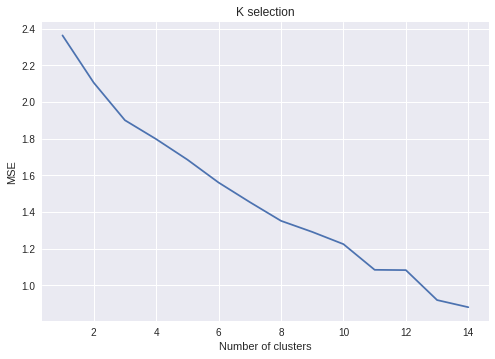

In [182]:
# Finding best k
plt.style.use("seaborn")
Ks = 15
mse = np.zeros((Ks-1))
blr_mum_grouped_clustering = blr_mum_grouped.drop(['Neighborhood','Neighborhood Latitude','Neighborhood Longitude'], 1)
for n in range(1,Ks):
    
    # set number of clusters
    kclusters = n
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0, init = 'random', n_init = 15).fit(blr_mum_grouped_clustering)
    mse[n-1] = kmeans.inertia_

plt.plot(range(1,Ks),mse)
plt.xlabel("Number of clusters")
plt.ylabel("MSE")
plt.title("K selection")
plt.show()

In [183]:
df = blr_mum_grouped[['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude']]
df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude
0,Andheri,19.119698,72.846420
1,Antop Hill,19.020761,72.865256
2,Arekere,12.887209,77.596049
3,BTM Layout,12.915177,77.610282
4,Banashankari,12.915221,77.573598
...,...,...,...
90,Vile Parle,19.100289,72.841762
91,Virar,19.467682,72.887997
92,Whitefield,12.969637,77.749745
93,Yelahanka,13.100698,77.596345


running k-means clustering algorithm on the dataset

In [184]:
# set number of clusters
kclusters = 11
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0, init = 'random', n_init = 15).fit(blr_mum_grouped_clustering)
    
blr_mum_merged = df

# add clustering labels
blr_mum_merged['Cluster Labels'] = kmeans.labels_

blr_mum_merged

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels
0,Andheri,19.119698,72.846420,8
1,Antop Hill,19.020761,72.865256,8
2,Arekere,12.887209,77.596049,10
3,BTM Layout,12.915177,77.610282,6
4,Banashankari,12.915221,77.573598,8
...,...,...,...,...
90,Vile Parle,19.100289,72.841762,1
91,Virar,19.467682,72.887997,9
92,Whitefield,12.969637,77.749745,4
93,Yelahanka,13.100698,77.596345,10


## 4. Data Visualization

map of bangalore after clustering

In [198]:
# create map
map_clusters = folium.Map(location=[blr_latitude, blr_longitude], zoom_start=11, width='100%', height='100%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(blr_mum_merged['Neighborhood Latitude'], blr_mum_merged['Neighborhood Longitude'], blr_mum_merged['Neighborhood'], blr_mum_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       


minimap = MiniMap(position = 'topleft', center_fixed = (blr_latitude, blr_longitude), zoom_level_fixed = 8)
minimap.add_to(map_clusters)

minimap = MiniMap(position='bottomright',  center_fixed = (mum_latitude, mum_longitude), zoom_level_fixed = 8)
minimap.add_to(map_clusters)
map_clusters

map of mumbai after clustering

In [199]:
# create map
map_clusters = folium.Map(location=[mum_latitude, mum_longitude], zoom_start=11, width='100%', height='100%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(blr_mum_merged['Neighborhood Latitude'], blr_mum_merged['Neighborhood Longitude'], blr_mum_merged['Neighborhood'], blr_mum_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       


minimap = MiniMap(position = 'topleft', center_fixed = (mum_latitude, mum_longitude), zoom_level_fixed = 8)
minimap.add_to(map_clusters)

minimap = MiniMap(position='bottomright',  center_fixed = (blr_latitude, blr_longitude), zoom_level_fixed = 8)
minimap.add_to(map_clusters)
map_clusters

map of Bangalore and Mumbai after clustering

In [185]:
# create map
map_clusters = folium.Map(location=[centerLatitude, centerLongitude], zoom_start=7, width='100%', height='100%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(blr_mum_merged['Neighborhood Latitude'], blr_mum_merged['Neighborhood Longitude'], blr_mum_merged['Neighborhood'], blr_mum_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Analysing the clusters

cluster-0

In [186]:
cluster0 = blr_mum_merged.loc[blr_mum_merged['Cluster Labels'] == 0, blr_mum_merged.columns[[0] + list(range(5, blr_mum_merged.shape[1]))]]
cluster0

,Neighborhood
85,Vasai


cluster-1

In [187]:
cluster1 = blr_mum_merged.loc[blr_mum_merged['Cluster Labels'] == 1, blr_mum_merged.columns[[0] + list(range(5, blr_mum_merged.shape[1]))]]
cluster1

,Neighborhood
9,Bellandur
16,Cantonment
18,Chickpet
19,Chickpete
20,Colaba
23,Domlur
24,Electronic City
25,Fort
36,Indiranagar
40,Jeevanbheema Nagar


cluster-2

In [188]:
cluster2 = blr_mum_merged.loc[blr_mum_merged['Cluster Labels'] == 2, blr_mum_merged.columns[[0] + list(range(5, blr_mum_merged.shape[1]))]]
cluster2

,Neighborhood
8,Basaveshwaranagar
11,Bhayandar
29,Goregaon
30,Gottigere
52,Krishnarajapuram
57,Mahadevapura
58,Mahalakshmi Layout
59,Malad
63,Mathikere
67,Nandini Layout


cluster-3

In [189]:
cluster3 = blr_mum_merged.loc[blr_mum_merged['Cluster Labels'] == 3, blr_mum_merged.columns[[0] + list(range(5, blr_mum_merged.shape[1]))]]
cluster3

,Neighborhood
82,Trombay


cluster-4

In [190]:
cluster4 = blr_mum_merged.loc[blr_mum_merged['Cluster Labels'] == 4, blr_mum_merged.columns[[0] + list(range(5, blr_mum_merged.shape[1]))]]
cluster4

,Neighborhood
50,Kengeri
66,Nagarbhavi
68,Nayandahalli
71,Peenya
92,Whitefield


cluster-5

In [191]:
cluster5 = blr_mum_merged.loc[blr_mum_merged['Cluster Labels'] == 5, blr_mum_merged.columns[[0] + list(range(5, blr_mum_merged.shape[1]))]]
cluster5

,Neighborhood
79,Sarjapura


cluster-6

In [192]:
cluster6 = blr_mum_merged.loc[blr_mum_merged['Cluster Labels'] == 6, blr_mum_merged.columns[[0] + list(range(5, blr_mum_merged.shape[1]))]]
cluster6

,Neighborhood
3,BTM Layout
12,Bommanahalli
14,Borivali
15,Byculla
22,Dahisar
27,Girgaon
43,Kalbadevi
45,Kamathipura
47,Kandivali east
48,Kandivali west


cluster-7

In [193]:
cluster7 = blr_mum_merged.loc[blr_mum_merged['Cluster Labels'] == 7, blr_mum_merged.columns[[0] + list(range(5, blr_mum_merged.shape[1]))]]
cluster7

,Neighborhood
6,Bandra
17,Chembur
26,Ghatkopar
49,Kanjurmarg
51,Khar
54,Kurla
72,Powai
87,Vidyavihar


cluster-8

In [194]:
cluster8 = blr_mum_merged.loc[blr_mum_merged['Cluster Labels'] == 8, blr_mum_merged.columns[[0] + list(range(5, blr_mum_merged.shape[1]))]]
cluster8

,Neighborhood
0,Andheri
1,Antop Hill
4,Banashankari
7,Basavanagudi
21,Dadar
28,Girinagar
31,Govandi
33,Hebbal
37,JP Nagar
38,Jalahalli


cluster-9

In [195]:
cluster9 = blr_mum_merged.loc[blr_mum_merged['Cluster Labels'] == 9, blr_mum_merged.columns[[0] + list(range(5, blr_mum_merged.shape[1]))]]
cluster9

,Neighborhood
91,Virar


cluster-10

In [196]:
cluster10 = blr_mum_merged.loc[blr_mum_merged['Cluster Labels'] == 10, blr_mum_merged.columns[[0] + list(range(5, blr_mum_merged.shape[1]))]]
cluster10

,Neighborhood
2,Arekere
5,Banaswadi
10,Bhandup
13,Bommasandra
32,HSR Layout
34,Horamavu
35,Hulimavu
44,Kalyan Nagar
46,Kammanahalli
55,Lingarajapuram
